In [1]:
import warnings
warnings.filterwarnings('ignore')

# Croatian Verb Categorization

authors: Rebeka Čorić, Domagoj Ševerdija, Lucian Šošić

## Problem definition

In this paper we present croatian verb classification from infinitive form to present form and vice-versa. In both cases convolutional Neural Network is employed to learn a classifer.

## Problem 1: Infinitive stem classification

In [2]:
from inf2pres.evaluate import evaluateOnTestSet, loadModel, heatmap, predict, probabilities
from inf2pres.utils         import ucitajPodatke, klase_prezent

### Dataset

Dataset consists of pairs $(w_{inf},C_{pres})$ where $w_{inf}$ denotes infinitive form of verb $w$ and $C_{pres}\in \{-am,-im,-jem,-em\}$ as a class denoted with respect to 1st person present suffix.


In [3]:
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('inf2pres/data/')

In [4]:
import pandas as pd
pd.set_option("display.precision", 2)


train_df = pd.DataFrame(train_set,columns=['word','class'])
val_df   = pd.DataFrame(val_set,columns=['word','class'])
test_df  = pd.DataFrame(test_set,columns=['word','class'])


stats = pd.DataFrame(data = 
                     {'classes' : klase_prezent.values(), 
                      'train' : train_df['class'].value_counts(sort=False), 
                      'val' : val_df['class'].value_counts(sort=False),
                      'test' : test_df['class'].value_counts(sort=False)},                                          
                      
        ).set_index('classes')

        
stats.loc['total']= stats.sum(numeric_only=True, axis=0)
stats.loc[:,'total']= stats.sum(numeric_only=True, axis=1)

idx= ['train','val','test','total']

df = stats.copy()
stats[idx] = stats[idx].apply(lambda x: x / x['total'] * 100, axis=0)

stats[idx]['total'] 
for c in idx : stats[c]['total'] = df[c]['total'] / df['total']['total'] * 100

print(stats.to_latex(index=True))

stats

\begin{tabular}{lrrrr}
\toprule
{} &  train &    val &   test &   total \\
classes &        &        &        &         \\
\midrule
am      &  36.04 &  35.96 &  35.95 &   36.02 \\
im      &  34.79 &  34.81 &  34.76 &   34.79 \\
jem     &  11.32 &  11.33 &  11.39 &   11.33 \\
em      &  17.85 &  17.90 &  17.90 &   17.86 \\
total   &  80.95 &   9.03 &  10.02 &  100.00 \\
\bottomrule
\end{tabular}



,train,val,test,total
classes,,,,
am,36.04,35.96,35.95,36.02
im,34.79,34.81,34.76,34.79
jem,11.32,11.33,11.39,11.33
em,17.85,17.90,17.90,17.86
total,80.95,9.03,10.02,100.00


#### Model evaluation

Our model is evaluated in terms of accuracy, micro-  and macro-averages of F1 scores together with weigthed $F_1$ score. We report a confusion matrix. 

 --------------Evaluation metrics: ----------------------           
 * test loss: 0.168
 * test accuracy: 0.942,
 * test rmse: 0.530,
 * test microF1: 0.927,
 * test macroF1: 0.942,
 * test weightedF1: 0.942


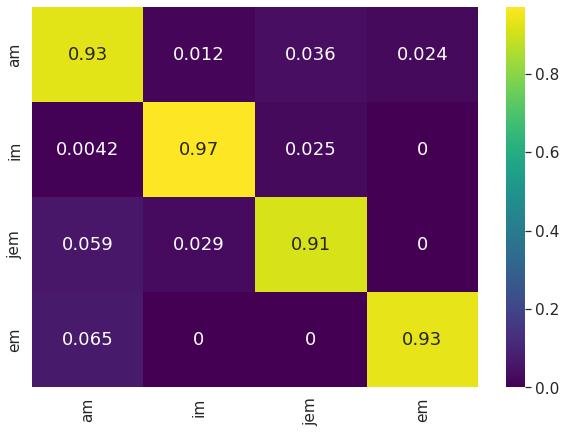

In [5]:
# evaluacija prethodno spremljenog modela
model_weights_path = 'inf2pres/results/20211208_162956/model.weights'
model = loadModel(model_weights_path)
evaluateOnTestSet(model, test_set,sve_kategorije)

### Model testing

Some interesting examples with an interpretation.

In [6]:
%%writefile inf2pres.input
glumovati
čarkati
čamiti
čupati
čarnuti
ispuznuti
zagrnuti
zagrliti
poodmaći
potpasti
preplesti
prostrti

Overwriting inf2pres.input


INF2PRES class: jem


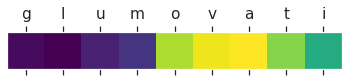

INF2PRES class: am


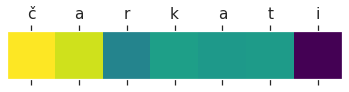

INF2PRES class: im


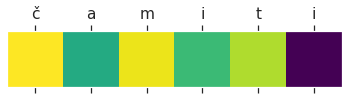

INF2PRES class: am


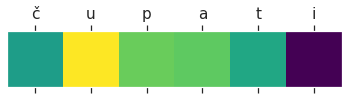

INF2PRES class: em


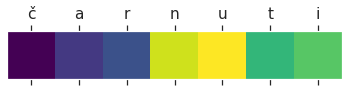

INF2PRES class: em


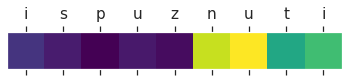

INF2PRES class: em


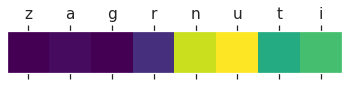

INF2PRES class: im


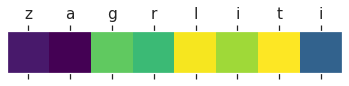

INF2PRES class: em


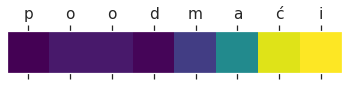

INF2PRES class: em


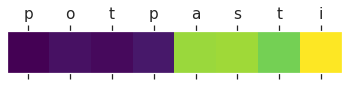

INF2PRES class: em


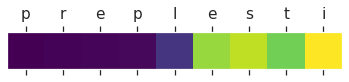

INF2PRES class: em


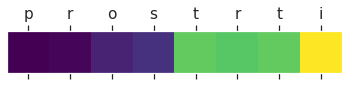

In [7]:
with open('inf2pres.input') as f:
    glagoli = f.read().splitlines()
    
#napravi heatmap
_ = [heatmap(model,gl) for gl in glagoli ]

In [8]:
for glagol in glagoli:
    prob = probabilities(model,glagol)
    print(f'{glagol}:   \t{prob}')

glumovati:   	{'jem': 0.485, 'am': 0.324, 'im': 0.191, 'em': 0.0}
čarkati:   	{'am': 0.581, 'im': 0.228, 'em': 0.192, 'jem': 0.0}
čamiti:   	{'im': 0.551, 'jem': 0.33, 'am': 0.119, 'em': 0.0}
čupati:   	{'am': 0.619, 'im': 0.331, 'jem': 0.05, 'em': 0.0}
čarnuti:   	{'em': 0.688, 'am': 0.162, 'im': 0.151, 'jem': 0.0}
ispuznuti:   	{'em': 0.768, 'jem': 0.126, 'am': 0.106, 'im': 0.0}
zagrnuti:   	{'em': 0.865, 'im': 0.132, 'am': 0.003, 'jem': 0.0}
zagrliti:   	{'im': 0.645, 'jem': 0.181, 'em': 0.175, 'am': 0.0}
poodmaći:   	{'em': 0.564, 'jem': 0.243, 'am': 0.193, 'im': 0.0}
potpasti:   	{'em': 0.749, 'jem': 0.172, 'im': 0.078, 'am': 0.0}
preplesti:   	{'em': 0.823, 'am': 0.134, 'jem': 0.043, 'im': 0.0}
prostrti:   	{'em': 0.674, 'im': 0.316, 'jem': 0.01, 'am': 0.0}


### Application of classificator

Testing `šetati`

INF2PRES class: am


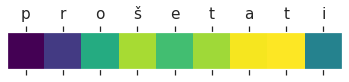

INF2PRES class: jem


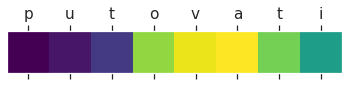

In [11]:
glagol = 'prošetati'
heatmap(model,glagol)

glagol = 'putovati'
heatmap(model,glagol)



## Problem 2: Present stem classification

In [6]:
from pres2inf.evaluate import evaluateOnTestSet, loadModel, heatmap, probabilities
from pres2inf.utils    import ucitajPodatke, klase_infinitiv

### Dataset

Dataset consists of pairs $(w_{inf},C_{pres})$ where $w_{inf}$ denotes infinitive form of verb $w$ and $C_{pres}\in \{-ati,-iti,-eti,-jeti,-uti,-rti,-sti,-ći\}$ as a class denoted with respect to 1st person present suffix.

In [7]:
# dataset
train_set, val_set, test_set, sve_kategorije = ucitajPodatke('pres2inf/data/')

In [8]:
import pandas as pd
train_df = pd.DataFrame(train_set,columns=['word','class'])
val_df   = pd.DataFrame(val_set,columns=['word','class'])
test_df  = pd.DataFrame(test_set,columns=['word','class'])



stats = pd.DataFrame(data = 
                     {'classes' : klase_infinitiv.values(), 
                      'train' : train_df['class'].value_counts(sort=False), 
                      'val' : val_df['class'].value_counts(sort=False),
                      'test' : test_df['class'].value_counts(sort=False)},                                          
                      
        ).set_index('classes')


        
stats.loc['total']= stats.sum(numeric_only=True, axis=0).astype(int)
stats.loc[:,'total']= stats.sum(numeric_only=True, axis=1).astype(int)

idx= ['train','val','test','total']

df = stats.copy()
stats[idx] = stats[idx].apply(lambda x: x / x['total'] * 100, axis=0)

stats[idx]['total'] 
for c in idx : stats[c]['total'] = df[c]['total'] / df['total']['total'] * 100

print(stats.to_latex(index=True))

stats



\begin{tabular}{lrrrr}
\toprule
{} &  train &    val &   test &   total \\
classes &        &        &        &         \\
\midrule
ati     &  53.90 &  53.59 &  53.38 &   53.82 \\
iti     &  32.16 &  31.86 &  31.91 &   32.11 \\
jeti    &   3.34 &   3.43 &   3.38 &    3.35 \\
eti     &   0.61 &   0.65 &   0.74 &    0.62 \\
uti     &   6.10 &   6.05 &   6.18 &    6.10 \\
sti     &   2.09 &   2.12 &   2.21 &    2.11 \\
rti     &   0.17 &   0.33 &   0.29 &    0.19 \\
ći      &   1.63 &   1.96 &   1.91 &    1.69 \\
total   &  80.83 &   9.08 &  10.09 &  100.00 \\
\bottomrule
\end{tabular}



,train,val,test,total
classes,,,,
ati,53.90,53.59,53.38,53.82
iti,32.16,31.86,31.91,32.11
jeti,3.34,3.43,3.38,3.35
eti,0.61,0.65,0.74,0.62
uti,6.10,6.05,6.18,6.10
sti,2.09,2.12,2.21,2.11
rti,0.17,0.33,0.29,0.19
ći,1.63,1.96,1.91,1.69
total,80.83,9.08,10.09,100.00


### Model evaluation

 --------------Evaluation metrics: ----------------------           
 * test loss: 0.165
 * test accuracy: 0.956,
 * test rmse: 0.437,
 * test microF1: 0.896,
 * test macroF1: 0.956,
 * test weightedF1: 0.953


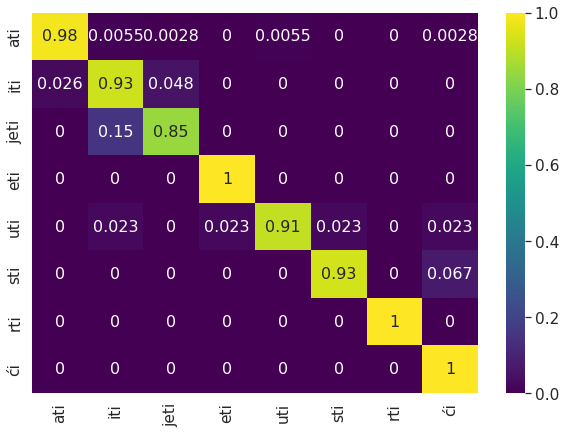

In [9]:
# evaluacija prethodno spremljenog modela
model_weights_path = 'pres2inf/results/model.weights'
model = loadModel(model_weights_path)
evaluateOnTestSet(model, test_set,sve_kategorije)

### Model testing

In [10]:
%%writefile pres2inf.input
glumovati
čarkati
čamiti
čupati
čarnuti
ispuznuti
zagrnuti
zagrliti
poodmaći
potpasti
preplesti
prostrti

Overwriting pres2inf.input


PRES2INF class: ati


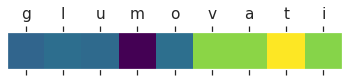

PRES2INF class: iti


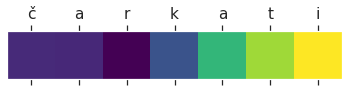

PRES2INF class: ati


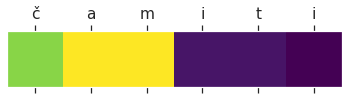

PRES2INF class: iti


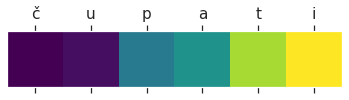

PRES2INF class: iti


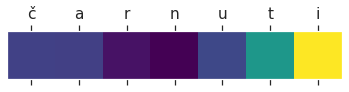

PRES2INF class: iti


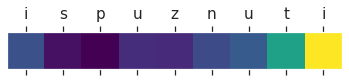

PRES2INF class: iti


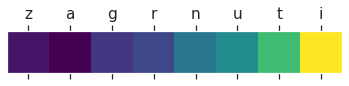

PRES2INF class: iti


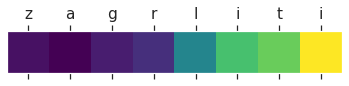

PRES2INF class: iti


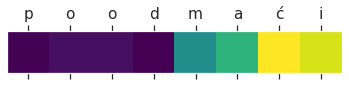

PRES2INF class: iti


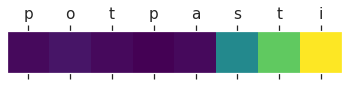

PRES2INF class: jeti


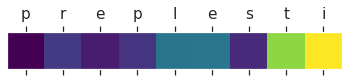

PRES2INF class: iti


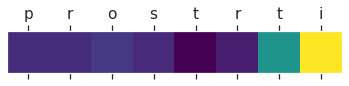

In [11]:
with open('pres2inf.input') as f:
    glagoli = f.read().splitlines()
    
#napravi heatmap
_ = [heatmap(gl,model) for gl in glagoli ]

In [12]:
prob = probabilities(model,glagoli[0])
for glagol in glagoli:
    print(f'{glagol}: \t{prob}')

glumim: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
čarkam: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
čamim: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
čupam: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
čarnem: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
ispuznem: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
zagrnem: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
zagrlim: 	{'iti': 0.277, 'jeti': 0.267, 'ati': 0.202, 'uti': 0.094, 'sti': 0.067, 'ći': 0.057, 'eti': 0.036, 'rti': 0.0}
poodmaknem: 	{'iti': 0.277, 'jeti': 0.